<p style="text-align: center;" ><font size="+3"><u><b>Laboratory 1 Part 2: Introduction to Imaging</u></b></p>

<p style="text-align: left;" ><font size="+1"><b>Objectives</b></p>

<div class="alert alert-block alert-warning">
<font color=black>

- Make your imaging system more quantitative
- Learn the focal length of your imaging system
- Redesign your microscope for a specific magnification

</font> 
</div>

<p style="text-align: left;" ><font size="+1"><b>Introduction</b></p>

<div class="alert alert-block alert-warning">
<font color='black'>
Scientific imaging typically requires quantitative measures. “Images are numbers” and those numbers are often significant to scientific questions. Often image values obtained by a camera are expressed in Arbitrary Digital Units (ADU), which are a function of the input light, detector sensitivity and conversion factors, and analog-to-digital conversion. You have already seen that you have a 10-bit camera whose values attain a maximum of 1023. However, scientifically, these values tend not to have a lot of absolute meaning without additional calibration. Similarly, the size and sampling of your image are dependent on how you have set up your optical system. In the following portions of the lab, you will calibrate ADU to have a scientific meaning (transmissivity) as well as establish the size and sampling of your image (so that you can label the actual sizes of features in your image).
</font> 
</div>

# Make your pixel values quantitative

<div class="alert alert-block alert-success">
<font color='black'> Use the nominal microscope set up from Part 1 of the lab (including aperture wide open). Place a slide in the system and ensure that exposure and illumination settings are good. Use one of the “no filter” settings on the filter wheel (we won’t use filters for the remainder of this lab). Similarly, focus the image and call this image $Y$. </font>
</div>

In [1]:
# add BaITools to path
import os
import sys
from IPython.display import Image
sys.path.insert(0,r'BaITools')
sys.path.insert(0,r'dlls')

dll_path = r"c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab1\dlls"
os.environ["PATH"] = dll_path + os.pathsep + os.environ["PATH"]

# for basic functions
import numpy as np
from time import sleep
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from IPython.display import display, clear_output
import cv2
plt.rcParams['font.size'] = 16   # set the font size globally

from zelux import ZeluxCamera as Camera  # for camera

In [ ]:
c.close()

In [2]:
print('Camera initialized as c')
c = Camera()
c.open()

# check image properties
c.get_properties()
c.set_exposure(10) 
c.get_exposure()
c.set_framerate(2)
c.get_framerate()


# try continuous capture
# to quit press live feed press "q"q
while True:
    # Convert the image from 10-bit to 8-bit and then display the image. 
     cv2.imshow('Camera', cv2.normalize(c.capture().copy(), None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U))
     if cv2.waitKey(30) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

Camera initialized as c
Camera Model 	 Thorlabs CS165MU
Pixel Size 	 3.45  microns
Image size 	 [1440, 1080]
Exposure 	 9.82  ms
Exposure Range 	 [0.46, 26843.07]  ms
Framerate 	 2.0
Frame Range 	 [0.9, 34.8]


In [4]:
c.close()

Camera initialized as c


Could not disarm camera; tl_camera_disarm() returned non-zero error code: 1003; error message: Camera handle is not valid. Check that the camera handle is not null and that the camera has not been closed. Error: Invalid parameter. Check documentation for detailed parameter information.
Exception ignored in: <function ZeluxCamera.__del__ at 0x000001E3FF2A0550>
Traceback (most recent call last):
  File "c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab1\BaITools\zelux.py", line 39, in __del__
    self._cam.disarm()
  File "c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab1\thorlabs_tsi_sdk\tl_camera.py", line 855, in disarm
    raise exception
  File "c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab1\thorlabs_tsi_sdk\tl_camera.py", line 852, in disarm
    raise TLCameraError(_create_c_failure_message(self._sdk, "tl_camera_disarm", error_code))
thorlabs_tsi_sdk.tl_camera.TLCameraError: tl_camera_

Camera Model 	 Thorlabs CS165MU
Pixel Size 	 3.45  microns
Image size 	 [1440, 1080]
Exposure 	 9.82  ms
Exposure Range 	 [0.46, 26843.07]  ms
Framerate 	 2.0
Frame Range 	 [0.9, 34.8]


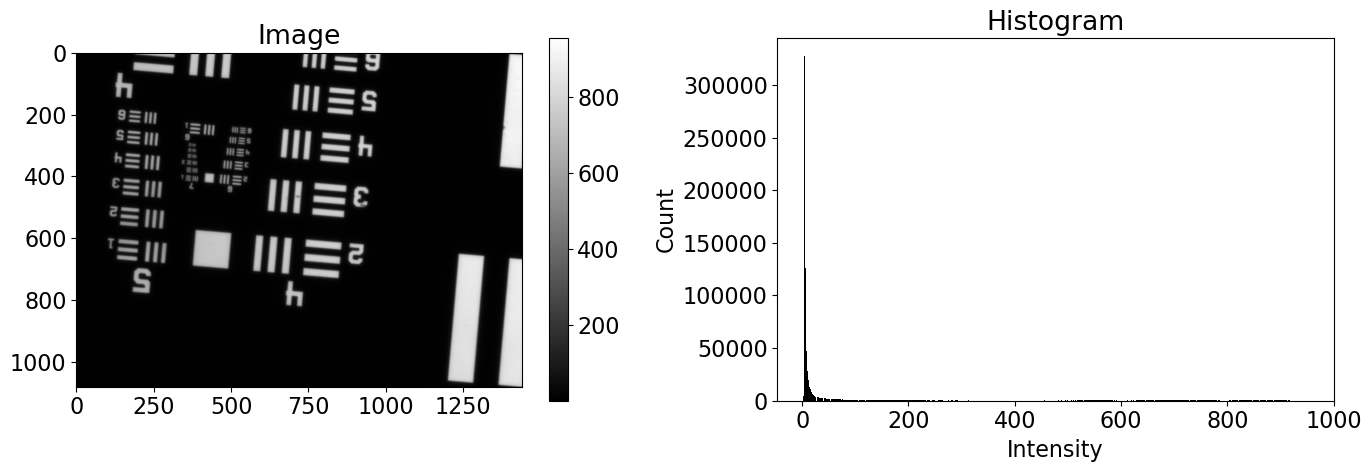

In [5]:
print('Camera initialized as c')
c = Camera()
c.open()

# check image properties
c.get_properties()
c.set_exposure(10) 
c.get_exposure()
c.set_framerate(2)
c.get_framerate()

Y = c.capture().copy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# img
x = ax1.imshow(Y, cmap='gray')
fig.colorbar(x, ax=ax1)
ax1.set_title("Image")
plt.imsave(f"fine_lines.png", Y, cmap='gray')
np.save("fine_lines.npy", Y)

# hist
ax2.hist(Y.ravel(), bins=1024, color='black')
ax2.set_title("Histogram")
ax2.set_xlabel("Intensity")
ax2.set_ylabel("Count")

c.close()
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<font color='black'> We would like to make the pixel values quantitative. For example, pixel values should denote the transmissivity of the sample (which can range from 0-100% transmission of the incident light). To obtain such quantitation, the system must be calibrated – e.g. what measurement values correspond to what transmission. To perform this calibration, we conduct two specialized image captures: <br/>


- “Dark” images – Turn off your LED illuminator and close the aperture all the way to prevent light from reaching the camera. Collect another set of 30 images. Average these and call this image $D$.  <br/>
- “Air-only” images – Move away from the slide (as shown in the picture below) and collect a series of 30 images with nothing in the system. Find the average of these 30 images (to reduce noise). Call this image $A$. </font>

</div>

<img src="Lab1\air_image_setup.jpg" style="width:400px">

In [32]:
c.close()

In [33]:
print('Camera initialized as c')
c = Camera()
c.open()

# check image properties
c.get_properties()
c.set_exposure(10) 
c.get_exposure()
c.set_framerate(2)
c.get_framerate()

for i in range(1, 31):
    img = c.capture().copy()
    np.save(f"light_off_{i}.npy", img)
    plt.imsave(f"light_off_{i}.png", img, cmap='gray')

c.close()

Camera initialized as c
Camera Model 	 Thorlabs CS165MU
Pixel Size 	 3.45  microns
Image size 	 [1440, 1080]
Exposure 	 9.82  ms
Exposure Range 	 [0.46, 26843.07]  ms
Framerate 	 2.0
Frame Range 	 [0.9, 34.8]


<div class="alert alert-block alert-success">

<b>Data collection:</b> <font color='black'> $A$, $D$, and $Y$ <br/>
    
<font color='black'>1. Mathematically (using $A$, $D$, and $Y$), what is the expression to obtain quantitative transmission data? <br/>Write the expression and its derivation below. </font>
    
</div>

Transmission fraction= $T$
$$ \text{Dynamic Range} = A - D$$
$$ \text{Detected transmission} = Y - D$$
$$T = \frac{Y - D}{A - D}$$


<div class="alert alert-block alert-success">
<font color='black'> 2. Create an image of your slide with quantitative transmission values and a colorbar, and show it below: </font>
    
</div>

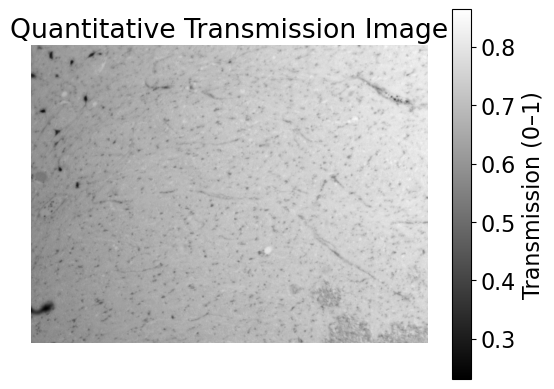

In [6]:
import glob
folder = r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab1\Output 2"

air_files = glob.glob(f"{folder}\\air_*.npy")
A = np.mean([np.load(file) for file in air_files], axis=0)

dark_files = glob.glob(f"{folder}\\light_off_*.npy")
D = np.mean([np.load(file) for file in dark_files], axis=0)

Y = np.load(f"{folder}\\slide.npy")
T = (Y - D) / (A - D)

plt.imshow(T, cmap='gray')
plt.colorbar(label='Transmission (0–1)')
plt.title("Quantitative Transmission Image")
plt.axis('off')
plt.show()

# Find the magnification of your microscope (Make your axes quantitative)

<div class="alert alert-block alert-warning">
   
<font color='black'> The actual pixel size of your DCC3240M camera is 5.3 $\mu$m. However, there is magnification between the object you are imaging and the image that falls on the sensor. To find the magnification, you need to measure the size of a known target in pixels. <br/><br>
We will be using the resolution target on your microscope. Move the target so that you can see the 100 $\mu$m grid (pink circle below, 100 $\mu$m is the distance per grid), and make sure it is in focus. 

</font>
</div>

<img src="Lab1\Grid.png" style="width:800px"> 

<div class="alert alert-block alert-success">
   
<font color='black'> 
Use Jupyter interactive plotting function (refer to Lab 0), and estimate the size of a pixel in terms of the actual slide feature size in the object plane. You can read the coordinates of the pixel the cursor is hovering over at the bottom of the plot. <br/> Counting pixels over several squares should improve your estimate. <br/><br/></font>
    
<b>In-class data collection:</b> <font color='black'> Image the 100 $\mu$m grid <br/><br/>
    
1. Show a zoomed image of the 100 $\mu$m grid and the distance you used to compute the pixel size:
</font>
</div>

In [42]:
c.close()

Could not disarm camera; tl_camera_disarm() returned non-zero error code: 1003; error message: Camera handle is not valid. Check that the camera handle is not null and that the camera has not been closed. Error: Invalid parameter. Check documentation for detailed parameter information.


Exception ignored in: <function ZeluxCamera.__del__ at 0x000002BD71C0BC10>
Traceback (most recent call last):
  File "c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab1\BaITools\zelux.py", line 39, in __del__
    self._cam.disarm()
  File "c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab1\thorlabs_tsi_sdk\tl_camera.py", line 855, in disarm
    raise exception
  File "c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab1\thorlabs_tsi_sdk\tl_camera.py", line 852, in disarm
    raise TLCameraError(_create_c_failure_message(self._sdk, "tl_camera_disarm", error_code))
thorlabs_tsi_sdk.tl_camera.TLCameraError: tl_camera_disarm() returned non-zero error code: 1003; error message: Camera handle is not valid. Check that the camera handle is not null and that the camera has not been closed. Error: Invalid parameter. Check documentation for detailed parameter information.


Camera initialized as c


Could not disarm camera; tl_camera_disarm() returned non-zero error code: 1003; error message: Camera handle is not valid. Check that the camera handle is not null and that the camera has not been closed. Error: Invalid parameter. Check documentation for detailed parameter information.
Exception ignored in: <function ZeluxCamera.__del__ at 0x000002BD71C0BC10>
Traceback (most recent call last):
  File "c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab1\BaITools\zelux.py", line 39, in __del__
    self._cam.disarm()
  File "c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab1\thorlabs_tsi_sdk\tl_camera.py", line 855, in disarm
    raise exception
  File "c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab1\thorlabs_tsi_sdk\tl_camera.py", line 852, in disarm
    raise TLCameraError(_create_c_failure_message(self._sdk, "tl_camera_disarm", error_code))
thorlabs_tsi_sdk.tl_camera.TLCameraError: tl_camera_

Camera Model 	 Thorlabs CS165MU
Pixel Size 	 3.45  microns
Image size 	 [1440, 1080]
Exposure 	 9.82  ms
Exposure Range 	 [0.46, 26843.07]  ms
Framerate 	 2.0
Frame Range 	 [0.9, 34.8]


Exception ignored in: <function ZeluxCamera.__del__ at 0x000002BD71C0BC10>
Traceback (most recent call last):
  File "c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab1\BaITools\zelux.py", line 39, in __del__
    self._cam.disarm()
AttributeError: 'ZeluxCamera' object has no attribute '_cam'


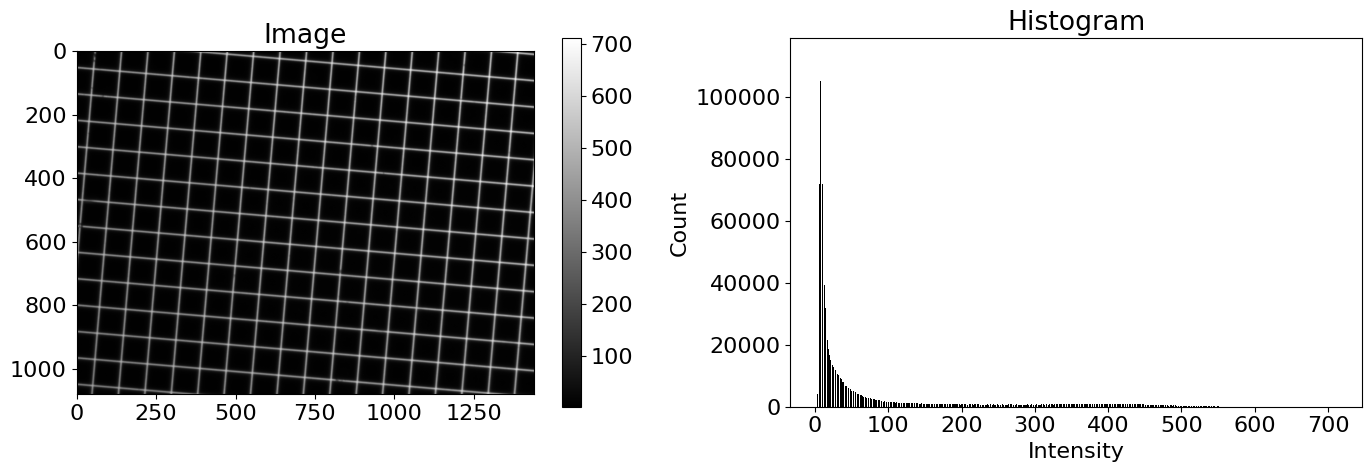

In [43]:
print('Camera initialized as c')
c = Camera()
c.open()

# check image properties
c.get_properties()
c.set_exposure(10) 
c.get_exposure()
c.set_framerate(2)
c.get_framerate()

Y = c.capture().copy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# img
x = ax1.imshow(Y, cmap='gray')
fig.colorbar(x, ax=ax1)
ax1.set_title("Image")
plt.imsave(f"distance.png", Y, cmap='gray')
np.save("distance.npy", Y)

# hist
ax2.hist(Y.ravel(), bins=1024, color='black')
ax2.set_title("Histogram")
ax2.set_xlabel("Intensity")
ax2.set_ylabel("Count")

c.close()
plt.tight_layout()
plt.show()

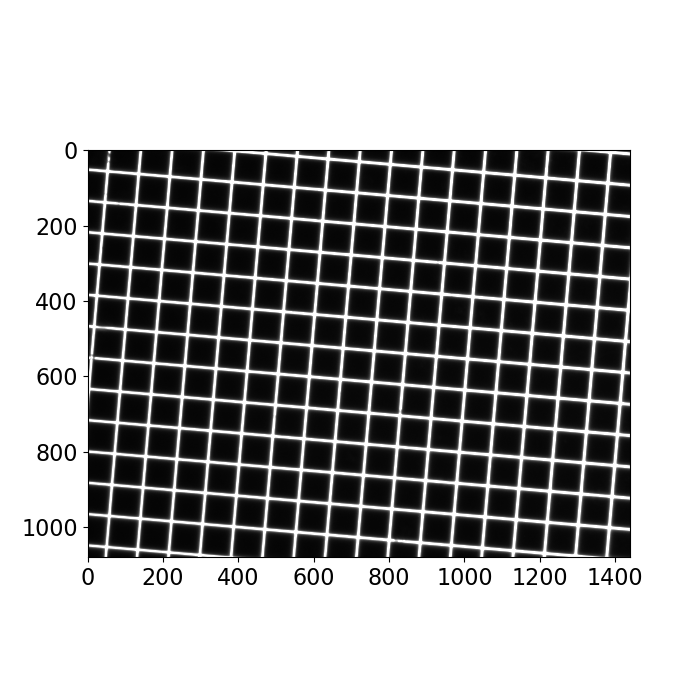

In [7]:
%matplotlib widget
plt.rcParams['font.size'] = '16'   # set the font size globally

distance = np.load("distance.npy")

fig, ax = plt.subplots(figsize=(7, 7))
x = ax.imshow(distance, cmap='gray', clim=[0, 255])  
pass

<div class="alert alert-block alert-success">
<font color='black'> 2. What is the size of one pixel in the object plane? </font>
</div>

NOTE: We are using the Thorlabs CS165MU camera model, not the DCC3240M; therefore, our camera’s pixel size is 3.45  microns. \
pixel size = 3.45 𝜇m \
Average Square Length: 67 pixels \
Size of one pixel = 100𝜇m / 67 pixels = 1.49 x 1.49 𝜇m per pixel

<div class="alert alert-block alert-success">
<font color='black'> 3. Magnification is the ratio of the size of the detected image to the size of the real object. What is the magnification of your system? </font>
</div>

Magnification = 3.45 / 1.49 = 2.3

<div class="alert alert-block alert-success">

<font color='black'>4. Take an image of the line pairs region (green circle above) in the resolution target and paste it below with a color bar and proper axis labels (mm).</font>

</div>

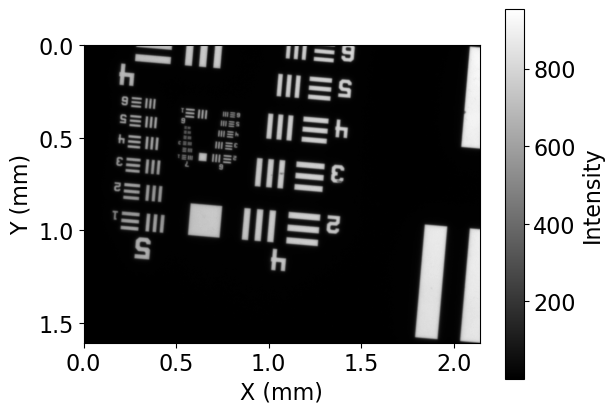

In [4]:
file_path = r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab1\Output 2\fine_lines.npy"
img = np.load(file_path)

scale_mm_per_pixel = 0.00149
height, width = img.shape
x = np.arange(width) * scale_mm_per_pixel
y = np.arange(height) * scale_mm_per_pixel

plt.imshow(img, cmap='gray', extent=[x.min(), x.max(), y.max(), y.min()])
plt.colorbar(label='Intensity')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.show()


<div class="alert alert-block alert-success">

<font color='black'>5. What are the finest line pairs that you can resolve? Show a zoomed image including the line pairs above and below this limit. (The following table will help you find the lp/mm for each target. Values are in lp/mm. The element number is labeled on the left of each line pair target; the group number is on top.)</font>

</div>

<img src="Lab1\LinePairTable.png" style="width:600px"> 

The finest line pairs that we resolve group 7 element 2, which is 144.0 ip/nm. At group 7 element 3, the lines become too blurred to distinguish between them. 

# Devise a strategy to measure the focal length of your lens

<div class="alert alert-block alert-warning">

<font color='black'> In lecture you learned about the lens equation, which permits you to compute the location of a focused image given the position of the object and the focal length of the lens. Thus, to design a system with a specific magnification, you need to know the focal length of the lens. This is straightforward if you can measure the distance between the lens and object and image; however, this is not necessarily easy when these planes are hidden within optical elements. Thus, we explore an alternate approach.</font> 

<font color='black'> Restating the lens equation, we know:
\begin{equation}
\frac{1}{a} + \frac{1}{b} = \frac{1}{f}
\end{equation} </font> 
    
    
<font color='black'> Consider the case where you measure the magnification in two focused optical systems but change the distance to the camera by a known amount (e.g. adding an optical tube of known length, z). The lens equation holds for both systems, but a and b will both change. Thus, you have: </font> 
    
<font color='black'> \begin{equation}
\frac{1}{a_1} + \frac{1}{b_1} = \frac{1}{f}
\end{equation} </font> 
    
<font color='black'> \begin{equation}
\frac{1}{a_1+z} + \frac{1}{b_2} = \frac{1}{f}
\end{equation} </font> 

<font color='black'> You already know how to measure magnification in each system and that magnification is related to object and image planes through the following equations: </font> 
    
<font color='black'> \begin{equation}
M_1 = \frac{a_1}{b_1}
\end{equation} </font> 

<font color='black'> \begin{equation}
M_2 = \frac{a_1+z}{b_2}
\end{equation} </font> 

<font color='black'> This means you have four equations and four unknowns ($a_1$, $b_1$, $b_2$, $f$) and two measured values ($M_1$, $M_2$) and one known value ($z$).  </font> 

</div>

<div class="alert alert-block alert-success">
    
<font color='black'> 1. Derive and state the mathematical relationship between $f$ and ($M_1$, $M_2$, $z$). Show a few intermediate steps.  </font> 
    

Lens equation: 1/f = 1/a + 1/b, where a is obj distance, b is img distance, and f is focal length

Magnification M = b / a.

Rearrange for a: a = b/M

Plug into Lens equation: 1/f = M/b + 1/b = (M+1)/b → b = f * (M+1)

for two systems with M1 and M2 and a known distance z,
f * (M2+1) =  f * (M1+1) + z

Rearrange:  f((M2 + 1) - (M1 + 1)) = z 

Solve for f: f = z / (M2 - M1)


<div class="alert alert-block alert-success">
    
<font color='black'> 2. What is the focal length of your lens in mm? ___________ </font>     

First Magnification Value: M1 = 2.3 

Length of optical tube: z = 0.5 inches = 12.7 mm \
Average Square Length: 78 pixels  \
Size of one pixel = 100𝜇m / 78pixels = 1.28 x 1.28 𝜇m per pixel \
Second Magnification Value: M2 = 3.45 / 1.28 = 2.7 

Focal length: \
f = z / (M2 - M1) \
f = 12.7 mm / (2.7 - 2.3) = 31.75 mm 


# Build a system to achieve a specific magnification goal

<div class="alert alert-block alert-success">

<font color='black'> 1. From the nominal microscope design that uses only the ½”, 1”, and 2” tubes, how much additional tube length is required to obtain a system with a magnification of 2.4x? </font>
</div>

initial tube length = 3.5 inches \
A 1-inch tube after the aperture (on the lens side), \
A 0.5-inch tube attached to the camera, \
A 2-inch tube after the filter wheel (connecting to the camera assembly).


new total tube length - 3.5 inch = f * (2.4 - initial magnification) \
new total tube length - 88.9 mm = 31.75 mm * (2.4 - 2.3) \
New total tube length = 92.075 mm - 88.9 mm = 3.175 mm = 0.125 in 


<div class="alert alert-block alert-success">

<font color='black'> 2. How would you achieve this using available tubes?  (The available tube lengths are: 2”, 1”, 0.5”, 0.3”). <br/><br/> Record the tube lengths you have designed, and we will build this system in class next time.</font>
 
</div>

With our initial magnification of 2.3, we are very close to obtaining a magnification fo 2.4x using the initial tube length. Therefore, there are no available tube lengths we could add to reach 2.4x magnification. One suggestion could be slightly unscrewing everything to gain the necessary 0.125 inches in additional length, but that would be ill-advised. 
